**This project focuses on building various machine learning models for Heart Disease prediction**

In [2]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
## Load the dataset
df = pd.read_csv("C:/Users/ADMIN/Desktop/Data Science/Datasets/Datasets/heart.csv")

In [4]:
## View the first few observations of the dataset
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
## Assess the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
## Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
## Check for duplicates
df.duplicated().sum()

723

In [8]:
## Number of males and females whose heart data is stored in the dataset
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [9]:
## Count of the number of males and females who have heart disease
df.sex[df.target==1].value_counts()

sex
1    300
0    226
Name: count, dtype: int64

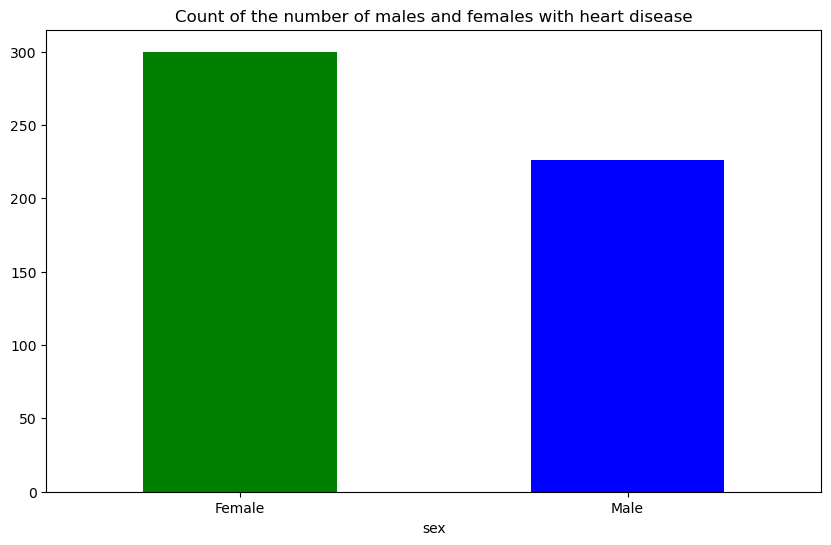

In [10]:
## Visualize your results
df.sex[df.target==1].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the number of males and females with heart disease")
plt.xticks([0,1], labels = ['Female', 'Male'], rotation =0)
plt.show()

In [11]:
## Contingency table
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


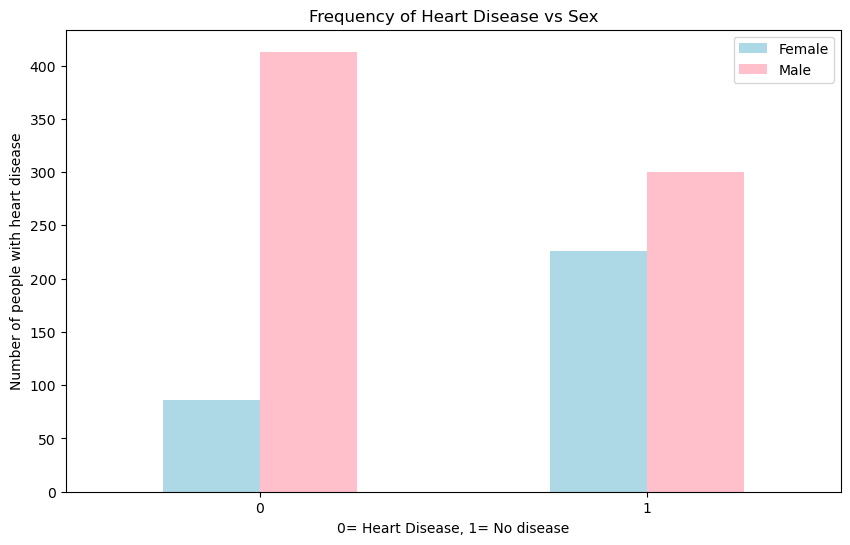

In [12]:
## Visualize the contingency table
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=["lightblue","pink"])
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("0= Heart Disease, 1= No disease")
plt.ylabel("Number of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [13]:
## Building a Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


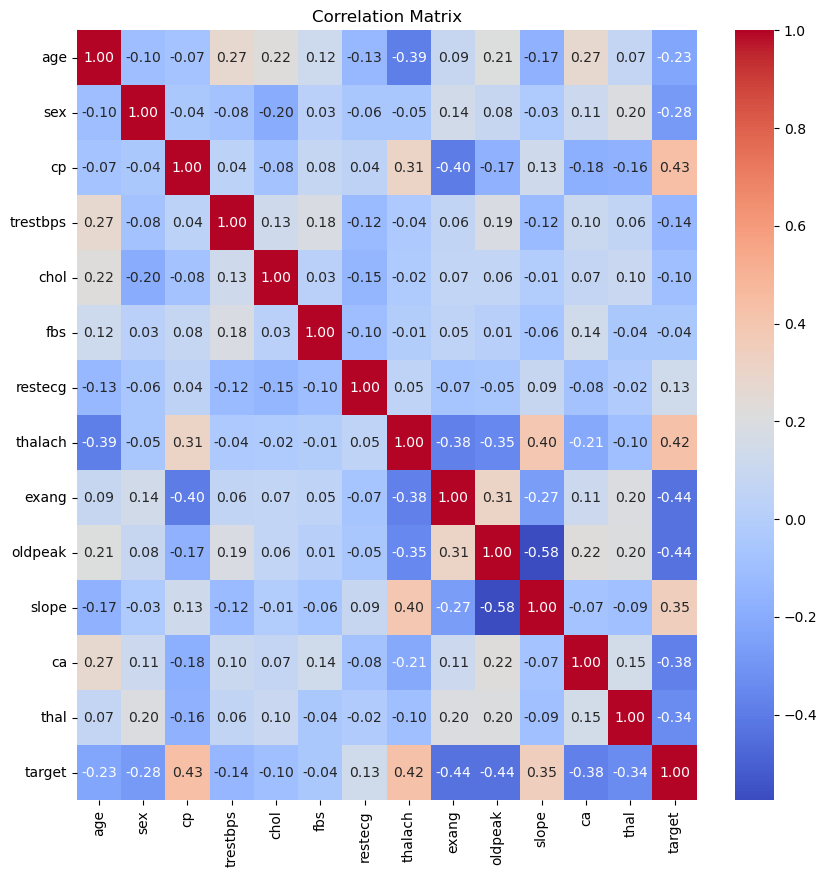

In [14]:
## Visualize the correlation matrix
cor_mat=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_mat,annot=True,cmap="coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Machine Learning

**Standardization using the MinMax Scaling**

In [17]:
## Load the required modules
from sklearn.preprocessing import MinMaxScaler

## Initialize the MinMaxScaler
scal=MinMaxScaler()

## Apply the MinMaxScaler
feat=['age', 'trestbps', 'thalach' ,'oldpeak' , 'chol']
df[feat] = scal.fit_transform(df[feat])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.292453,0.196347,0,1,0.740458,0,0.161290,2,2,3,0
1,0.500000,1,0,0.433962,0.175799,1,0,0.641221,1,0.500000,0,0,3,0
2,0.854167,1,0,0.481132,0.109589,0,1,0.412214,1,0.419355,0,0,3,0
3,0.666667,1,0,0.509434,0.175799,0,1,0.687023,0,0.000000,2,1,3,0
4,0.687500,0,0,0.415094,0.383562,1,1,0.267176,0,0.306452,1,3,2,0


**Creating Features and Target variable**

In [23]:
X = df.drop("target",axis=1).values
y = df.target.values

**Distribution of the Study Outcome**

In [24]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

**Handling Class Imbalance**

In [25]:
## Load the required module
from imblearn.over_sampling import RandomOverSampler

## Initialize the RandomOverSampler
ros = RandomOverSampler(random_state = 42)

## Apply the RandomOverSampler
X_resampled, y_resampled = ros.fit_resample(X, y)

## Print the oversampled data
dict(zip(*np.unique(y_resampled, return_counts = True)))

{0: 526, 1: 526}

**Splitting the data into train and test sets**

In [26]:
## Load the required module
from sklearn.model_selection import train_test_split

## Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state = 42, test_size = 0.2)

**Machine Learning implementation**

**1. K-Nearest Neighbors**

In [38]:
## Setting the random seed for reproducibility
np.random.seed(42)

## Loading the required module
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score

## Initializing the KNN Classifier
knn=  KNeighborsClassifier()

## Fitting the model
knn.fit(X_train, y_train)

## Making predictions
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, knn_pred))
print("F1 Score:", f1_score(y_test, knn_pred, average='macro'))
print("Precision:", precision_score(y_test, knn_pred, average='macro'))
print("Recall:", recall_score(y_test, knn_pred, average='macro'))
print("Accuracy:", knn_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        94
           1       0.90      0.85      0.88       117

    accuracy                           0.87       211
   macro avg       0.87      0.87      0.87       211
weighted avg       0.87      0.87      0.87       211

F1 Score: 0.8664315427744619
Precision: 0.8654504504504504
Recall: 0.868839789052555
Accuracy: 0.8672985781990521


**2. Logistic Regression**

In [31]:
## Load the required module
from sklearn.linear_model import LogisticRegression

## Initialize the LogisticRegression
log = LogisticRegression()

## Fit the model
log.fit(X_train, y_train)

## Make predictions
log_pred = log.predict(X_test)
log_score = accuracy_score(y_test, log_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, log_pred))
print("F1 Score:", f1_score(y_test, log_pred, average='macro'))
print("Precision:", precision_score(y_test, log_pred, average='macro'))
print("Recall:", recall_score(y_test, log_pred, average='macro'))
print("Accuracy:", knn_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81        94
           1       0.83      0.90      0.86       117

    accuracy                           0.84       211
   macro avg       0.84      0.83      0.83       211
weighted avg       0.84      0.84      0.84       211

F1 Score: 0.8348222508749309
Precision: 0.8419572553430821
Recall: 0.8316966721222041
Accuracy: 0.8672985781990521


**3. Random Forest**

In [33]:
## Load the required module
from sklearn.ensemble import RandomForestClassifier

## Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)

## Fit the model
rf.fit(X_train, y_train)

## Make predictions
rf_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test, rf_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred, average='macro'))
print("Precision:", precision_score(y_test, rf_pred, average='macro'))
print("Recall:", recall_score(y_test, rf_pred, average='macro'))
print("Accuracy:", rf_score)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       117

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


**4. Support Vector Machines**

In [35]:
## Load the required module
from sklearn.svm import SVC

## Initialize the model
svm = SVC()

## Fit the model
svm.fit(X_train, y_train)

## Make predictions
svm_pred = svm.predict(X_test)
svm_score = accuracy_score(y_test, svm_pred)

## Evaluate performance
print("Classification Report:\n", classification_report(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred, average='macro'))
print("Precision:", precision_score(y_test, svm_pred, average='macro'))
print("Recall:", recall_score(y_test, svm_pred, average='macro'))
print("Accuracy:", svm_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90        94
           1       0.92      0.92      0.92       117

    accuracy                           0.91       211
   macro avg       0.91      0.91      0.91       211
weighted avg       0.91      0.91      0.91       211

F1 Score: 0.9087723290476732
Precision: 0.9092400218698742
Recall: 0.9083469721767594
Accuracy: 0.909952606635071


## Comparing the performance of different models

In [36]:
## Model comparison
model_comp = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine'], 'Accuracy': [log_score*100,
                    rf_score*100, knn_score*100, svm_score*100]})
model_comp

,Model,Accuracy
0,Logistic Regression,83.886256
1,Random Forest,100.000000
2,K-Nearest Neighbour,86.729858
3,Support Vector Machine,90.995261


# Visualization of the Models Results

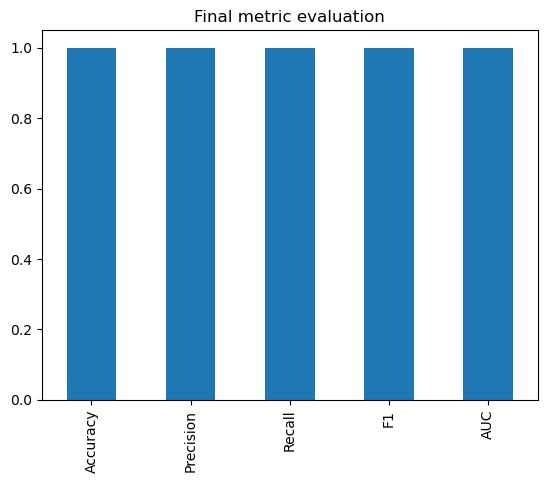

In [39]:
final_metrics={'Accuracy': rf.score(X_test, y_test),
                   'Precision': precision_score(y_test, rf_pred),
                   'Recall': recall_score(y_test, rf_pred),
                   'F1': f1_score(y_test, rf_pred),
                   'AUC': roc_auc_score(y_test, rf_pred)}

metrics=pd.DataFrame(final_metrics,index=[0])

metrics.T.plot.bar(title='Final metric evaluation',legend=False);

# Create the confusion matrix of the best model

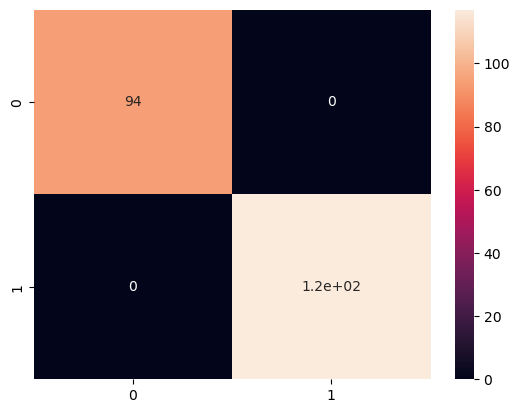

In [40]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(y_test, rf_pred),annot=True,cbar=True);

**Let's save our model using pickle**

In [41]:
## Lets save our model using pickle
import pickle as pkl
pkl.dump(rf, open("heart_disease_model1.sav", "wb"))